In [1]:
#Preprocessing
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
import h5py
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib_venn import venn3, venn3_circles
import pickle
import gzip
import pandas as pd
import requests
import openslide
from openslide.deepzoom import DeepZoomGenerator
from openslide import open_slide
import math
import pdb
import time
import os
import matplotlib.patches as mpatches
import pickle
import numpy as np
import h5py
%matplotlib inline



In [2]:
from keras.models import Sequential, Model
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, Input, Dense
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

Using TensorFlow backend.


In [3]:


tissue_types = ['Lung', 'Artery - Tibial', 'Heart - Left Ventricle', 'Breast - Mammary Tissue', 'Brain - Cerebellum', 'Pancreas', 'Testis', 'Liver', 'Ovary', 'Stomach']
lung_expression_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/ExpressionFiles/phe000006.v2.GTEx_RNAseq.expression-data-matrixfmt.c1/parse_data/44_tissues/GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_gene_rpkm_{}_normalised_without_inverse_gene_expression.txt'.format("Lung")

def build_empty_model():
    inception_model = InceptionV3(weights='imagenet', include_top=False)

    x = inception_model.output

    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(input=inception_model.input, output=predictions)
    return model

def get_donor_IDs(IDlist):
    return [str(x).split('-')[1] for x in IDlist]

In [3]:
data_tile_number = 10
data_tile_level_index = -1
t = "Lung"
[lung_X, tl, lung_ID] = pickle.load(open('../data/processed/patches/lung_data_{}_{}_{}.py'.format(t,data_tile_number,data_tile_level_index), 'rb'))

In [5]:
model = build_empty_model()



In [15]:
model.layers[178]

In [3]:
# Generate from scratch
model_tile_number = 50
model_tile_level_index = -1
model = build_empty_model()
model.load_weights('../models/inception_50_-1_gs1.h5')

final_layer_model = Model(model.input, model.layers[-2].output)
lung_full_representations = final_layer_model.predict(lung_X)

pickle.dump(lung_full_representations,open('../data/processed/representations/all_lung_representations_model_{}_{}_gs{}_data_{}_{}'.format(model_tile_number,model_tile_level_index,1,data_tile_number,data_tile_level_index), 'wb'))


In [12]:
all(np.array(tl) == 'Lung')

True

In [6]:
%matplotlib inline

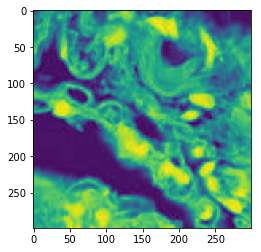

In [21]:
plt.imshow(lung_X[27][:,:,1].astype(np.float32))

In [22]:
lung_X[27].shape

(299, 299, 3)

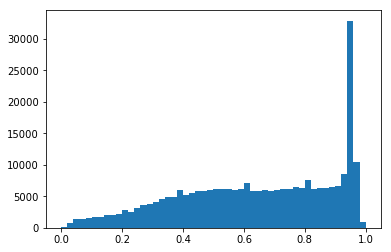

In [24]:
plt.hist( (1-lung_X[27].astype(np.float32)).flatten(), bins=50)
plt.show()